In [1]:
import pandas as pd

all_tweets = pd.read_json("random_tweets.json", lines=True)

print(len(all_tweets))
print(all_tweets.columns)
print(all_tweets.loc[0]['text'])

11099
Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang', 'possibly_sensitive', 'quoted_status_id',
       'quoted_status_id_str', 'extended_entities', 'quoted_status',
       'withheld_in_countries'],
      dtype='object')
RT @KWWLStormTrack7: We are more than a month into summer but the days are getting shorter. The sunrise is about 25 minutes later on July 3…


In [2]:
import numpy as np
print(np.median(all_tweets["retweet_count"]))

13.0


In [3]:
all_tweets['is_viral'] = np.where(all_tweets['retweet_count'] > 13, 1, 0)
all_tweets['is_viral'].value_counts()

0    5562
1    5537
Name: is_viral, dtype: int64

In [4]:
all_tweets['tweet_length'] = all_tweets.apply(lambda tweet: len(tweet['text']), axis=1)
all_tweets['followers_count'] = all_tweets.apply(lambda tweet: tweet['user']['followers_count'], axis=1)
all_tweets['friends_count'] = all_tweets.apply(lambda tweet: tweet['user']['friends_count'], axis=1)

In [5]:
all_tweets['hashtags'] = all_tweets.apply(lambda tweet: tweet['text'].count("#"), axis=1)
all_tweets['links'] = all_tweets.apply(lambda tweet: tweet['text'].count("http"), axis=1)
all_tweets['words'] = all_tweets.apply(lambda tweet: len(tweet['text'].split()), axis=1)

In [6]:
print(all_tweets.head())

                 created_at                   id               id_str  \
0 2018-07-31 13:34:40+00:00  1024287229525598210  1024287229525598208   
1 2018-07-31 13:34:40+00:00  1024287229512953856  1024287229512953856   
2 2018-07-31 13:34:40+00:00  1024287229504569344  1024287229504569344   
3 2018-07-31 13:34:40+00:00  1024287229496029190  1024287229496029184   
4 2018-07-31 13:34:40+00:00  1024287229492031490  1024287229492031488   

                                                text  truncated  \
0  RT @KWWLStormTrack7: We are more than a month ...      False   
1  @hail_ee23 Thanks love its just the feeling of...      False   
2  RT @TransMediaWatch: Pink News has more on the...      False   
3  RT @realDonaldTrump: One of the reasons we nee...      False   
4  RT @First5App: This hearing of His Word doesn’...      False   

                                            entities  \
0  {'hashtags': [], 'symbols': [], 'user_mentions...   
1  {'hashtags': [], 'symbols': [], 'user_menti

In [7]:
labels = all_tweets['is_viral']
data = all_tweets[['tweet_length', 'followers_count', 'friends_count', 'hashtags', 'links', 'words']]

In [8]:
from sklearn.preprocessing import scale
scaled_data = scale(data, axis = 0)
print(scaled_data[0])

[ 0.6164054  -0.02878298 -0.14483305 -0.32045057 -0.78415588  1.15105133]


In [9]:
from sklearn.model_selection import train_test_split
training_data, validation_data, training_labels, validation_labels = train_test_split(scaled_data, labels, train_size = 0.8, test_size = 0.2, random_state = 1)

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(training_data, training_labels)
print(classifier.score(validation_data, validation_labels))


0.7175675675675676


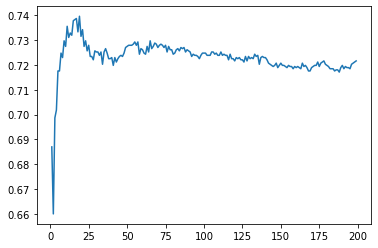

In [11]:
import matplotlib.pyplot as plt
scores = []
for k in range(1,200):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(training_data, training_labels)
    scores.append(classifier.score(validation_data, validation_labels))
plt.plot(range(1,200), scores)
plt.show()
